In [1]:
import math ; pi=math.pi
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
%matplotlib notebook
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import time
import json
import imp

In [8]:
np.warnings.filterwarnings('ignore')

In [2]:
import PySSC
import PySSC_AP

In [3]:
# If you want to change cosmology, specify the parameters with a dictionnary in the format of CLASS :
params = {'omega_b':0.022,'omega_cdm':0.12,'H0':67.,'n_s':0.96,'sigma8':0.81}

In [4]:
zstakes = np.linspace(0.2,1.5,num=14)
zmin = np.min(zstakes) ; zmax = np.max(zstakes)
# we have zmin zmax and 14 intermediates redshifts that define some boundaries

In [5]:
# Define redshift range
nz       = 500
z_arr    = np.linspace(0,2,num=nz+1)[1:] # Redshifts must be > 0

# TopHat window

In [6]:
nbins_T   = len(zstakes)-1
windows_T = np.zeros((nbins_T,nz))
for i in range(nbins_T):
    zminbin = zstakes[i] ; zmaxbin = zstakes[i+1] ; Dz = zmaxbin-zminbin
    for iz in range(nz):
        z = z_arr[iz]
        if ((z>zminbin) and (z<=zmaxbin)):
            windows_T[i,iz] = 1/Dz

In [11]:
imp.reload(PySSC_AP) #if needed

start_time = time.time()
Sijw_T = PySSC.Sij(z_arr,windows_T)
print(time.time() - start_time)
start_time = time.time()
Sijw_T_AngPow = PySSC_AP.Sij_AngPow(z_arr,windows_T,clmask=None,mask='./masks/full_sky_map.fits',verbose=True)
print(time.time() - start_time)

4.901764154434204
Using mask map, given as a fits file
f_sky = 1.0000
lmax = 1
81.69150853157043


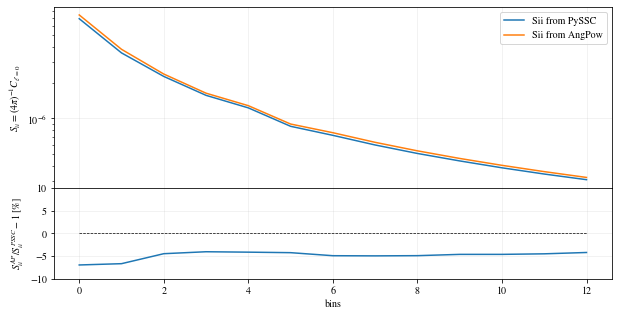

In [12]:
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.semilogy(np.arange(nbins_T),np.diag(Sijw_T),label='Sii from PySSC')
ax1.plot(np.arange(nbins_T),np.diag(Sijw_T_AngPow),label='Sii from AngPow')
ax2.set_xlabel('bins')
ax1.set_ylabel('$S_{ii}=(4\pi)^{-1}C_{\ell=0}$')
ax2.set_ylabel('$S_{ii}^{AP}/S_{ii}^{PSSC} -1\ [\%]$')
ax1.legend()
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
ax2.set_ylim((-10,10))
ax2.plot(np.arange(nbins_T),100*(np.diag(Sijw_T)/np.diag(Sijw_T_AngPow)-1))
ax2.plot(np.arange(nbins_T),np.zeros(nbins_T),'r--',color='black',linewidth=0.7)
fig.subplots_adjust(hspace=.0)
fig.show()

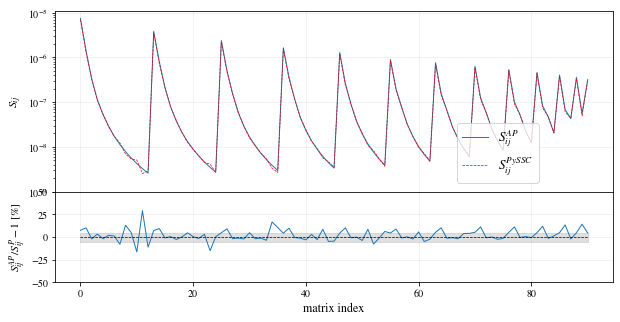

In [13]:
def plotting_offD(Sij):
    cov_vector = []
    for j,i in itertools.product(range(Sij.shape[0]),range(Sij.shape[1])):
        if i>=j:
            cov_vector.append(Sij[i,j])
    return (np.array(cov_vector));
    

cov_vector1 = plotting_offD(Sijw_T_AngPow)
cov_vector2 = plotting_offD(Sijw_T)

diff = ((Sijw_T_AngPow / Sijw_T)-1)*100
cov_vector3 = plotting_offD(diff)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.set_ylabel('$S_{ij}$',fontsize=12);ax2.set_ylabel('$S_{ij}^{AP}/S_{ij}^{P} -1\ [\%]$',fontsize=11.5)
ax2.set_xlabel('matrix index',fontsize=12)
ax1.semilogy(np.arange(len(cov_vector1)),abs(cov_vector1),linewidth='1',label='$S_{ij}^{AP}$')
ax1.semilogy(np.arange(len(cov_vector2)),abs(cov_vector2),'r--',linewidth='0.7',label='$S_{ij}^{PySSC}$')
ax2.plot(np.arange(len(cov_vector3)),cov_vector3,linewidth='1')
ax2.plot(np.arange(len(cov_vector3)),np.zeros(len(cov_vector3)),'r--',color='black',linewidth=0.7)
ax1.set_ylim(1e-9);ax2.set_ylim((-50,50))
ax2.fill_between(np.arange(len(cov_vector3)),5,-5,color='silver',alpha=0.5)
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
ax1.legend(fontsize=13,loc=(0.72,0.05))
fig.subplots_adjust(hspace=.0)
fig.show()

# Gaussian window 1

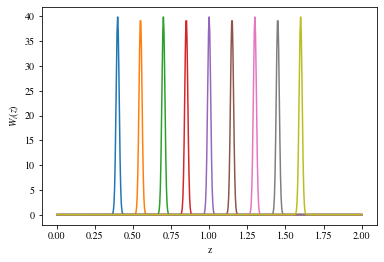

In [14]:
sigmaz    = 0.01
zcenter_G = [0.4,0.55,0.7,0.85,1.,1.15,1.3,1.45,1.6]
nbins_G   = len(zcenter_G)
windows_G = np.zeros((nbins_G,nz))
for i in range(nbins_G):
    windows_G[i,:] = np.exp(-(z_arr-zcenter_G[i])**2/(2*sigmaz**2)) / np.sqrt(2*pi*sigmaz**2)

# Plot window functions
fig,ax=plt.subplots(1,1)
for i in range(nbins_G):
    ax.plot(z_arr,windows_G[i,:])
ax.set_xlabel('z') ; ax.set_ylabel('$W_i(z)$')
fig.show()

In [15]:
imp.reload(PySSC_AP) #if needed

start_time = time.time()
Sijw_G = PySSC.Sij(z_arr,windows_G)
print(time.time() - start_time)
start_time = time.time()
Sijw_G_AngPow = PySSC_AP.Sij_AngPow(z_arr,windows_G,clmask=None,mask='./masks/full_sky_map.fits',verbose=True)
print(time.time() - start_time)

3.8117685317993164
Using mask map, given as a fits file
f_sky = 1.0000
lmax = 1
43.72992658615112


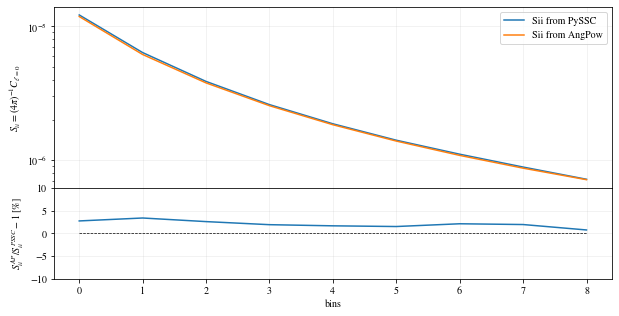

In [18]:
nbins_G = len(np.diag(Sijw_G))
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.semilogy(np.arange(nbins_G),np.diag(Sijw_G)   ,label='Sii from PySSC')
ax1.plot(np.arange(nbins_G),np.diag(Sijw_G_AngPow),label='Sii from AngPow')
ax2.set_xlabel('bins')
ax1.set_ylabel('$S_{ii}=(4\pi)^{-1}C_{\ell=0}$')
ax2.set_ylabel('$S_{ii}^{AP}/S_{ii}^{PSSC} -1\ [\%]$')
ax1.legend()
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
ax2.set_ylim((-10,10))
ax2.plot(np.arange(nbins_G),100*(np.diag(Sijw_G)/np.diag(Sijw_G_AngPow)-1))
ax2.plot(np.arange(nbins_G),np.zeros(nbins_G),'r--',color='black',linewidth=0.7)
fig.subplots_adjust(hspace=.0)
fig.show()

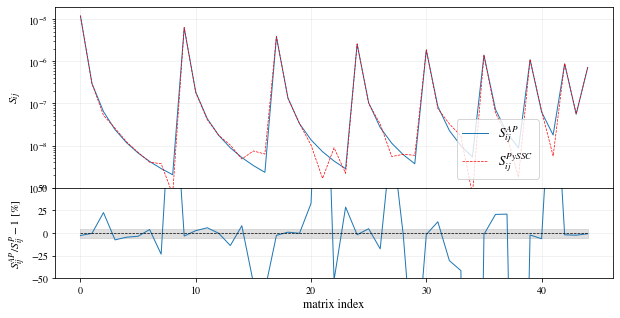

In [19]:
cov_vector1 = plotting_offD(Sijw_G_AngPow)
cov_vector2 = plotting_offD(Sijw_G)

diff = ((Sijw_G_AngPow / Sijw_G)-1)*100
cov_vector3 = plotting_offD(diff)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.set_ylabel('$S_{ij}$',fontsize=12);ax2.set_ylabel('$S_{ij}^{AP}/S_{ij}^{P} -1\ [\%]$',fontsize=11.5)
ax2.set_xlabel('matrix index',fontsize=12)
ax1.semilogy(np.arange(len(cov_vector1)),abs(cov_vector1),linewidth='1',label='$S_{ij}^{AP}$')
ax1.semilogy(np.arange(len(cov_vector2)),abs(cov_vector2),'r--',linewidth='0.7',label='$S_{ij}^{PySSC}$')
ax2.plot(np.arange(len(cov_vector3)),cov_vector3,linewidth='1')
ax2.plot(np.arange(len(cov_vector3)),np.zeros(len(cov_vector3)),'r--',color='black',linewidth=0.7)
ax1.set_ylim(1e-9);ax2.set_ylim((-50,50))
ax2.fill_between(np.arange(len(cov_vector3)),5,-5,color='silver',alpha=0.5)
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
ax1.legend(fontsize=13,loc=(0.72,0.05))
fig.subplots_adjust(hspace=.0)
fig.show()

# Gaussian window 2

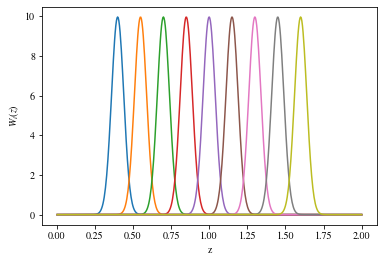

In [45]:
sigmaz    = 0.04
zcenter_G = [0.4,0.55,0.7,0.85,1.,1.15,1.3,1.45,1.6]
nbins_G   = len(zcenter_G)
windows_G = np.zeros((nbins_G,nz))
for i in range(nbins_G):
    windows_G[i,:] = np.exp(-(z_arr-zcenter_G[i])**2/(2*sigmaz**2)) / np.sqrt(2*pi*sigmaz**2)

# Plot window functions
fig,ax=plt.subplots(1,1)
for i in range(nbins_G):
    ax.plot(z_arr,windows_G[i,:])
ax.set_xlabel('z') ; ax.set_ylabel('$W_i(z)$')
fig.show()

In [46]:
imp.reload(PySSC_AP) #if needed

start_time = time.time()
Sijw_G = PySSC.Sij(z_arr,windows_G)
print(time.time() - start_time)
start_time = time.time()
Sijw_G_AngPow = PySSC_AP.Sij_AngPow(z_arr,windows_G,clmask=None,mask='./masks/full_sky_map.fits',verbose=True)
print(time.time() - start_time)

6.646050930023193
Using mask map, given as a fits file
f_sky = 1.0000
lmax = 1
68.3041582107544


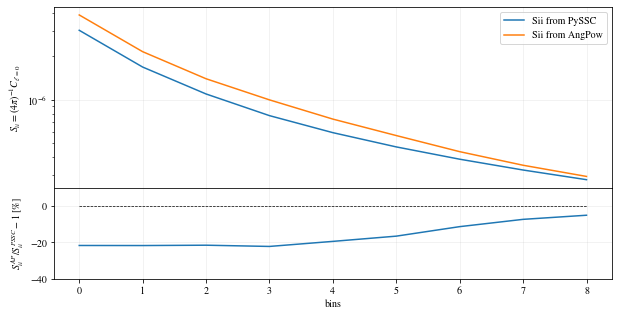

In [48]:
nbins_G = len(np.diag(Sijw_G))
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.semilogy(np.arange(nbins_G),np.diag(Sijw_G)   ,label='Sii from PySSC')
ax1.plot(np.arange(nbins_G),np.diag(Sijw_G_AngPow),label='Sii from AngPow')
ax2.set_xlabel('bins')
ax1.set_ylabel('$S_{ii}=(4\pi)^{-1}C_{\ell=0}$')
ax2.set_ylabel('$S_{ii}^{AP}/S_{ii}^{PSSC} -1\ [\%]$')
ax1.legend()
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
ax2.set_ylim((-40,10))
ax2.plot(np.arange(nbins_G),100*(np.diag(Sijw_G)/np.diag(Sijw_G_AngPow)-1))
ax2.plot(np.arange(nbins_G),np.zeros(nbins_G),'r--',color='black',linewidth=0.7)
fig.subplots_adjust(hspace=.0)
fig.show()

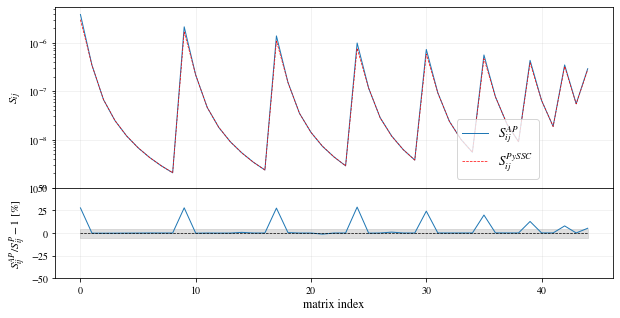

In [23]:
cov_vector1 = plotting_offD(Sijw_G_AngPow)
cov_vector2 = plotting_offD(Sijw_G)

diff = ((Sijw_G_AngPow / Sijw_G)-1)*100
cov_vector3 = plotting_offD(diff)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.set_ylabel('$S_{ij}$',fontsize=12);ax2.set_ylabel('$S_{ij}^{AP}/S_{ij}^{P} -1\ [\%]$',fontsize=11.5)
ax2.set_xlabel('matrix index',fontsize=12)
ax1.semilogy(np.arange(len(cov_vector1)),abs(cov_vector1),linewidth='1',label='$S_{ij}^{AP}$')
ax1.semilogy(np.arange(len(cov_vector2)),abs(cov_vector2),'r--',linewidth='0.7',label='$S_{ij}^{PySSC}$')
ax2.plot(np.arange(len(cov_vector3)),cov_vector3,linewidth='1')
ax2.plot(np.arange(len(cov_vector3)),np.zeros(len(cov_vector3)),'r--',color='black',linewidth=0.7)
ax1.set_ylim(1e-9);ax2.set_ylim((-50,50))
ax2.fill_between(np.arange(len(cov_vector3)),5,-5,color='silver',alpha=0.5)
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
ax1.legend(fontsize=13,loc=(0.72,0.05))
fig.subplots_adjust(hspace=.0)
fig.show()

# Dirac window 
### (need to adapt precision)

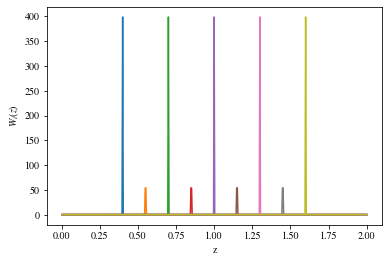

In [24]:
sigmaz    = 0.001
zcenter_G = [0.4,0.55,0.7,0.85,1.,1.15,1.3,1.45,1.6]
nbins_G   = len(zcenter_G)
windows_G = np.zeros((nbins_G,nz))
for i in range(nbins_G):
    windows_G[i,:] = np.exp(-(z_arr-zcenter_G[i])**2/(2*sigmaz**2)) / np.sqrt(2*pi*sigmaz**2)

# Plot window functions
fig,ax=plt.subplots(1,1)
for i in range(nbins_G):
    ax.plot(z_arr,windows_G[i,:])
ax.set_xlabel('z') ; ax.set_ylabel('$W_i(z)$')
fig.show()

In [25]:
imp.reload(PySSC_AP) #if needed

start_time = time.time()
Sijw_G = PySSC.Sij(z_arr,windows_G)
print(time.time() - start_time)
start_time = time.time()
Sijw_G_AngPow = PySSC_AP.Sij_AngPow(z_arr,windows_G,clmask=None,mask='./masks/full_sky_map.fits',verbose=True)
print(time.time() - start_time)

3.757439374923706
Using mask map, given as a fits file
f_sky = 1.0000
lmax = 1
45.02017879486084


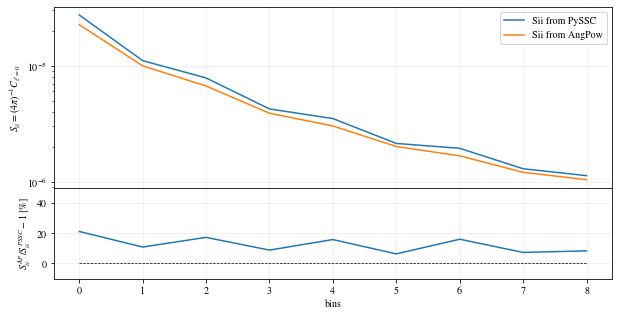

In [26]:
nbins_G = len(np.diag(Sijw_G))
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.semilogy(np.arange(nbins_G),np.diag(Sijw_G)   ,label='Sii from PySSC')
ax1.plot(np.arange(nbins_G),np.diag(Sijw_G_AngPow),label='Sii from AngPow')
ax2.set_xlabel('bins')
ax1.set_ylabel('$S_{ii}=(4\pi)^{-1}C_{\ell=0}$')
ax2.set_ylabel('$S_{ii}^{AP}/S_{ii}^{PSSC} -1\ [\%]$')
ax1.legend()
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
ax2.set_ylim((-10,50))
ax2.plot(np.arange(nbins_G),100*(np.diag(Sijw_G)/np.diag(Sijw_G_AngPow)-1))
ax2.plot(np.arange(nbins_G),np.zeros(nbins_G),'r--',color='black',linewidth=0.7)
fig.subplots_adjust(hspace=.0)
fig.show()

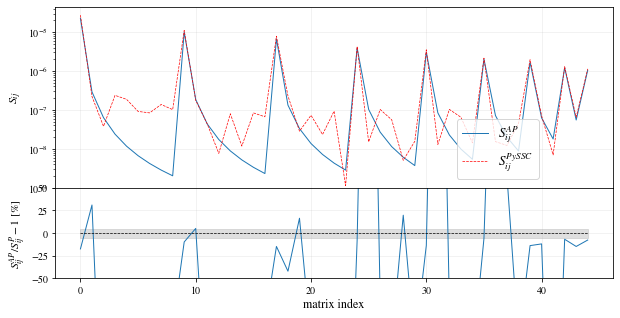

In [27]:
cov_vector1 = plotting_offD(Sijw_G_AngPow)
cov_vector2 = plotting_offD(Sijw_G)

diff = ((Sijw_G_AngPow / Sijw_G)-1)*100
cov_vector3 = plotting_offD(diff)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.set_ylabel('$S_{ij}$',fontsize=12);ax2.set_ylabel('$S_{ij}^{AP}/S_{ij}^{P} -1\ [\%]$',fontsize=11.5)
ax2.set_xlabel('matrix index',fontsize=12)
ax1.semilogy(np.arange(len(cov_vector1)),abs(cov_vector1),linewidth='1',label='$S_{ij}^{AP}$')
ax1.semilogy(np.arange(len(cov_vector2)),abs(cov_vector2),'r--',linewidth='0.7',label='$S_{ij}^{PySSC}$')
ax2.plot(np.arange(len(cov_vector3)),cov_vector3,linewidth='1')
ax2.plot(np.arange(len(cov_vector3)),np.zeros(len(cov_vector3)),'r--',color='black',linewidth=0.7)
ax1.set_ylim(1e-9);ax2.set_ylim((-50,50))
ax2.fill_between(np.arange(len(cov_vector3)),5,-5,color='silver',alpha=0.5)
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
ax1.legend(fontsize=13,loc=(0.72,0.05))
fig.subplots_adjust(hspace=.0)
fig.show()

# Partial sky, same examples as "Partsky_examples.ipynb"

In [28]:
imp.reload(PySSC_AP) #if needed
imp.reload(PySSC)

<module 'PySSC' from '/renoir/baratta/software/PySSC/PySSC.py'>

In [29]:
# Redshift bins
zstakes = np.linspace(0.2,1.5,num=14)
zmin = np.min(zstakes) ; zmax = np.max(zstakes)
# Window function
nz       = 500
z_arr    = np.linspace(0,2,num=nz+1)[1:] # Redshifts must be > 0
nbins_T   = len(zstakes)-1
windows_T = np.zeros((nbins_T,nz))
for i in range(nbins_T):
    zminbin = zstakes[i] ; zmaxbin = zstakes[i+1] ; Dz = zmaxbin-zminbin
    for iz in range(nz):
        z = z_arr[iz]
        if ((z>zminbin) and (z<=zmaxbin)):
            windows_T[i,iz] = 1/Dz

## Comparison of Sij matrix for full sky and partial sky Sij for full-sky mask

In [30]:
# full sky Sij
t0 = time.clock()
print('Full sky Sij')
Sijw_full = PySSC.Sij(z_arr,windows_T)
# partial sky Sij with full-sky mask
t1 = time.clock()
print('Partial sky Sij')
Sijw_part = PySSC.Sij_psky(z_arr,windows_T,clmask=None,mask='./masks/full_sky_map.fits') #long computation
t2 = time.clock()
print('AngPow Sij')
Sijw_AP = PySSC_AP.Sij_AngPow(z_arr,windows_T,clmask=None,mask='./masks/full_sky_map.fits',verbose=True)
t3 = time.clock()
print('Sij full sky took: %.1f secs, part sky %.1f secs, AngPow %.1f secs' %(t1-t0,t2-t1,t3-t2))

Full sky Sij
Partial sky Sij
AngPow Sij
Using mask map, given as a fits file
f_sky = 1.0000
lmax = 1
Sij full sky took: 42.6 secs, part sky 152.8 secs, AngPow 143.1 secs


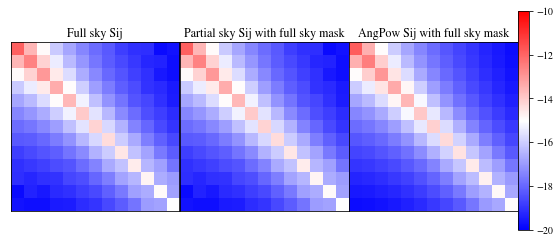

In [31]:
# Plotting the two matrices
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(8,3.5))
im = axes[0].imshow(np.log(abs(Sijw_full)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
im2 = axes[1].imshow(np.log(abs(Sijw_part)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
im3 = axes[2].imshow(np.log(abs(Sijw_AP)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
axes[0].set_title('Full sky Sij')
axes[1].set_title('Partial sky Sij with full sky mask')
axes[2].set_title('AngPow Sij with full sky mask')
fig.subplots_adjust(left=0.02,bottom=0.08,top=0.9,wspace=0.002)
cbar_ax = fig.add_axes([0.9, 0.08, 0.02, 0.87])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=.5)

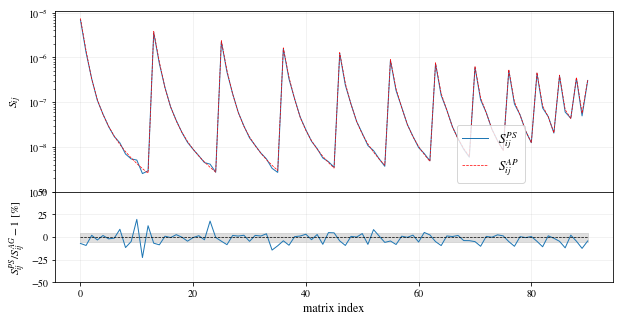

In [32]:
cov_vector1 = plotting_offD(Sijw_part)
cov_vector2 = plotting_offD(Sijw_AP)

diff = ((Sijw_part / Sijw_AP)-1)*100
cov_vector3 = plotting_offD(diff)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.set_ylabel('$S_{ij}$',fontsize=12);ax2.set_ylabel('$S_{ij}^{PS}/S_{ij}^{AG} -1\ [\%]$',fontsize=11.5)
ax2.set_xlabel('matrix index',fontsize=12)
ax1.semilogy(np.arange(len(cov_vector1)),abs(cov_vector1),linewidth='1',label='$S_{ij}^{PS}$')
ax1.semilogy(np.arange(len(cov_vector2)),abs(cov_vector2),'r--',linewidth='0.7',label='$S_{ij}^{AP}$')
ax2.plot(np.arange(len(cov_vector3)),cov_vector3,linewidth='1')
ax2.plot(np.arange(len(cov_vector3)),np.zeros(len(cov_vector3)),'r--',color='black',linewidth=0.7)
ax1.set_ylim(1e-9);ax2.set_ylim((-50,50))
ax2.fill_between(np.arange(len(cov_vector3)),5,-5,color='silver',alpha=0.5)
ax1.grid(alpha=0.2) ; ax2.grid(alpha=0.2)
ax1.legend(fontsize=13,loc=(0.72,0.05))
fig.subplots_adjust(hspace=.0)
fig.show()

## Partial sky Sij for DES mask

In [33]:
t0 = time.clock()
Sijw_part_DES = PySSC.Sij_psky(z_arr,windows_T,mask='./masks/DES-mask-simple-ring-1024.fits',verbose=True)
t1 = time.clock()
print('Computed in %.1f minutes' %((t1-t0)/60))

Using mask map, given as a fits file
f_sky = 0.1207
lmax = 32
Computed in 4.1 minutes


In [34]:
t0 = time.clock()
Sijw_AngPow_DES = PySSC_AP.Sij_AngPow(z_arr,windows_T,mask='./masks/DES-mask-simple-ring-1024.fits',verbose=True)
t1 = time.clock()
print('Computed in %.1f minutes' %((t1-t0)/60))

Using mask map, given as a fits file
f_sky = 0.1207
lmax = 32
Computed in 2.5 minutes


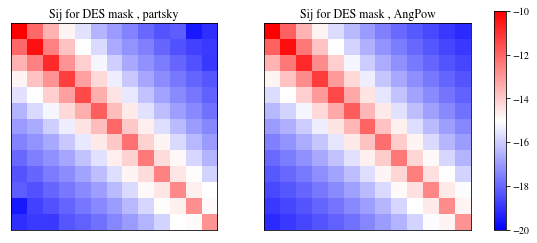

In [35]:
# Plotting the two matrices
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(8,3.5))
im = axes[0].imshow(np.log(abs(Sijw_part_DES)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
im2 = axes[1].imshow(np.log(abs(Sijw_AngPow_DES)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
axes[0].set_title('Sij for DES mask , partsky')
axes[1].set_title('Sij for DES mask , AngPow')
fig.subplots_adjust(left=0.02,bottom=0.08,top=0.9,wspace=0.002)
cbar_ax = fig.add_axes([0.9, 0.08, 0.02, 0.87])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=.5)

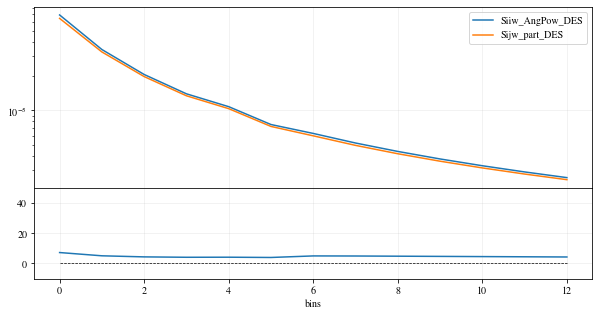

In [36]:
nbins_G = len(np.diag(Sijw_AngPow_DES))
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.semilogy(np.arange(nbins_G),np.diag(Sijw_AngPow_DES)   ,label='Siiw_AngPow_DES')
ax1.plot(np.arange(nbins_G),np.diag(Sijw_part_DES),label='Sijw_part_DES')
ax2.set_xlabel('bins')
ax1.legend()
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
ax2.set_ylim((-10,50))
ax2.plot(np.arange(nbins_G),100*(np.diag(Sijw_AngPow_DES)/np.diag(Sijw_part_DES)-1))
ax2.plot(np.arange(nbins_G),np.zeros(nbins_G),'r--',color='black',linewidth=0.7)
fig.subplots_adjust(hspace=.0)
fig.show()

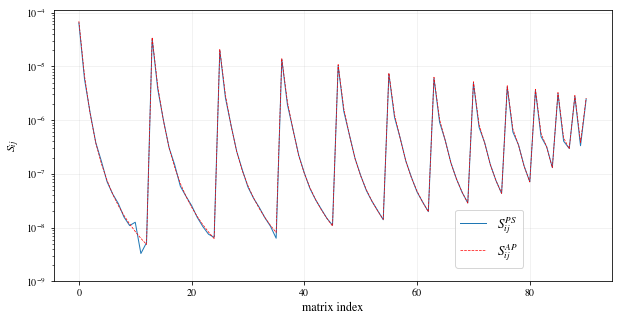

In [37]:
cov_vector1 = plotting_offD(Sijw_part_DES)
cov_vector2 = plotting_offD(Sijw_AngPow_DES)

diff = ((Sijw_part_DES / Sijw_AngPow_DES)-1)*100
cov_vector3 = plotting_offD(diff)

fig, (ax1) = plt.subplots(1,1, sharex=True, gridspec_kw=dict(height_ratios=[1]),figsize=(10,5))
ax1.set_ylabel('$S_{ij}$',fontsize=12);ax2.set_ylabel('$S_{ij}^{PS}/S_{ij}^{AG} -1\ [\%]$',fontsize=11.5)
ax1.set_xlabel('matrix index',fontsize=12)
ax1.semilogy(np.arange(len(cov_vector1)),abs(cov_vector1),linewidth='1',label='$S_{ij}^{PS}$')
ax1.semilogy(np.arange(len(cov_vector2)),abs(cov_vector2),'r--',linewidth='0.7',label='$S_{ij}^{AP}$')
#ax2.plot(np.arange(len(cov_vector3)),cov_vector3,linewidth='1')
#ax2.plot(np.arange(len(cov_vector3)),np.zeros(len(cov_vector3)),'r--',color='black',linewidth=0.7)
ax1.set_ylim(1e-9)#;ax2.set_ylim((-50,50))
#ax2.fill_between(np.arange(len(cov_vector3)),5,-5,color='silver',alpha=0.5)
ax1.grid(alpha=0.2)# ; ax2.grid(alpha=0.2)
ax1.legend(fontsize=13,loc=(0.72,0.05))
fig.subplots_adjust(hspace=.0)
fig.show()

## Partial sky Sij for Euclid mask

In [38]:
t0 = time.clock()
Sijw_part_Euclid = PySSC.Sij_psky(z_arr,windows_T,mask='./masks/Euclid_map_WIDE_SURVEY.fits',verbose=True)
t1 = time.clock()
print('Computed in %.1f minutes' %((t1-t0)/60))

Using mask map, given as a fits file
f_sky = 0.3762
lmax = 27
Computed in 2.2 minutes


In [39]:
t0 = time.clock()
Sijw_AngPow_Euclid = PySSC_AP.Sij_AngPow(z_arr,windows_T,mask='./masks/Euclid_map_WIDE_SURVEY.fits',verbose=True)
t1 = time.clock()
print('Computed in %.1f minutes' %((t1-t0)/60))

Using mask map, given as a fits file
f_sky = 0.3762
lmax = 27
Computed in 0.9 minutes


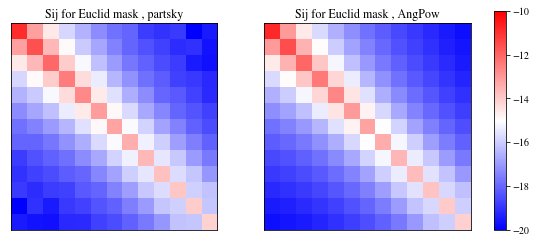

In [40]:
# Plotting the two matrices
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(8,3.5))
im = axes[0].imshow(np.log(abs(Sijw_part_Euclid)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
im2 = axes[1].imshow(np.log(abs(Sijw_AngPow_Euclid)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
axes[0].set_title('Sij for Euclid mask , partsky')
axes[1].set_title('Sij for Euclid mask , AngPow')
fig.subplots_adjust(left=0.02,bottom=0.08,top=0.9,wspace=0.002)
cbar_ax = fig.add_axes([0.9, 0.08, 0.02, 0.87])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=.5)

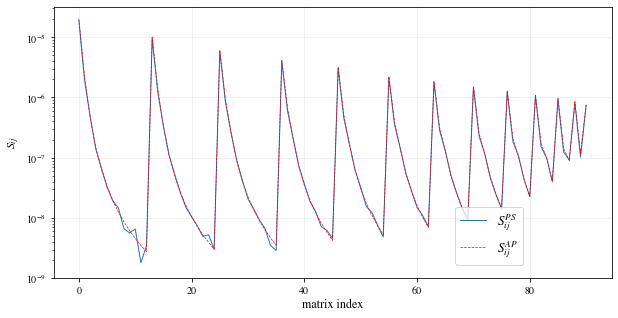

In [41]:
cov_vector1 = plotting_offD(Sijw_part_Euclid)
cov_vector2 = plotting_offD(Sijw_AngPow_Euclid)

diff = ((Sijw_part_Euclid / Sijw_AngPow_Euclid)-1)*100
cov_vector3 = plotting_offD(diff)

fig, (ax1) = plt.subplots(1,1, sharex=True, gridspec_kw=dict(height_ratios=[1]),figsize=(10,5))
ax1.set_ylabel('$S_{ij}$',fontsize=12)#;ax2.set_ylabel('$S_{ij}^{PS}/S_{ij}^{AG} -1\ [\%]$',fontsize=11.5)
ax1.set_xlabel('matrix index',fontsize=12)
ax1.semilogy(np.arange(len(cov_vector1)),abs(cov_vector1),linewidth='1',label='$S_{ij}^{PS}$')
ax1.semilogy(np.arange(len(cov_vector2)),abs(cov_vector2),'r--',linewidth='0.7',label='$S_{ij}^{AP}$')
#ax2.plot(np.arange(len(cov_vector3)),cov_vector3,linewidth='1')
#ax2.plot(np.arange(len(cov_vector3)),np.zeros(len(cov_vector3)),'r--',color='black',linewidth=0.7)
ax1.set_ylim(1e-9);ax2.set_ylim((-50,50))
#ax2.fill_between(np.arange(len(cov_vector3)),5,-5,color='silver',alpha=0.5)
ax1.grid(alpha=0.2) #; ax2.grid(alpha=0.2)
ax1.legend(fontsize=13,loc=(0.72,0.05))
fig.subplots_adjust(hspace=.0)
fig.show()

## Partial sky Sij for 5 degrees patch

In [ ]:
t0 = time.clock()
Sijw_part_5d = PySSC.Sij_psky(z_arr,windows_T,mask='./masks/circular-mask_5deg.fits',verbose=True)
t1 = time.clock()
print('Computed in %.1f minutes' %((t1-t0)/60))

In [ ]:
t0 = time.clock()
Sijw_AngPow_5d = PySSC_AP.Sij_AngPow(z_arr,windows_T,mask='./masks/circular-mask_5deg.fits',var_precision=0.05,verbose=True)
t1 = time.clock()
print('Computed in %.1f minutes' %((t1-t0)/60))

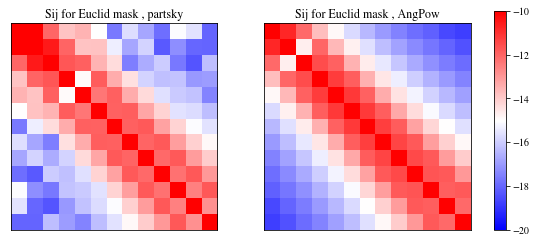

In [193]:
# Plotting the two matrices
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(8,3.5))
im = axes[0].imshow(np.log(abs(Sijw_part_5d)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
im2 = axes[1].imshow(np.log(abs(Sijw_AngPow_5d)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
axes[0].set_title('Sij for Euclid mask , partsky')
axes[1].set_title('Sij for Euclid mask , AngPow')
fig.subplots_adjust(left=0.02,bottom=0.08,top=0.9,wspace=0.002)
cbar_ax = fig.add_axes([0.9, 0.08, 0.02, 0.87])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=.5)

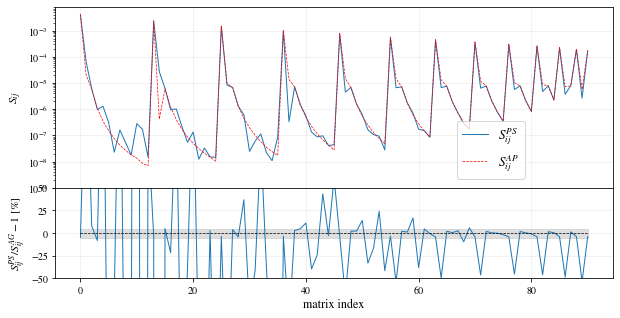

In [192]:
cov_vector1 = plotting_offD(Sijw_part_5d)
cov_vector2 = plotting_offD(Sijw_AngPow_5d)

diff = ((Sijw_part_5d / Sijw_AngPow_5d)-1)*100
cov_vector3 = plotting_offD(diff)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.set_ylabel('$S_{ij}$',fontsize=12);ax2.set_ylabel('$S_{ij}^{PS}/S_{ij}^{AG} -1\ [\%]$',fontsize=11.5)
ax2.set_xlabel('matrix index',fontsize=12)
ax1.semilogy(np.arange(len(cov_vector1)),abs(cov_vector1),linewidth='1',label='$S_{ij}^{PS}$')
ax1.semilogy(np.arange(len(cov_vector2)),abs(cov_vector2),'r--',linewidth='0.7',label='$S_{ij}^{AP}$')
ax2.plot(np.arange(len(cov_vector3)),cov_vector3,linewidth='1')
ax2.plot(np.arange(len(cov_vector3)),np.zeros(len(cov_vector3)),'r--',color='black',linewidth=0.7)
ax1.set_ylim(1e-9);ax2.set_ylim((-50,50))
ax2.fill_between(np.arange(len(cov_vector3)),5,-5,color='silver',alpha=0.5)
ax1.grid(alpha=0.2) ; ax2.grid(alpha=0.2)
ax1.legend(fontsize=13,loc=(0.72,0.05))
fig.subplots_adjust(hspace=.0)
fig.show()

# Same but with gaussian window

In [ ]:
#Top-hat window functions have no interest here, since the cross-spectra would be basically zero
#So we go for Gaussian window functions
sigmaz    = 0.05
zcenter_G = [0.4,0.55,0.7,0.85,1.,1.15,1.3,1.45,1.6]
nbins_G   = len(zcenter_G)
windows_G = np.zeros((nbins_G,nz))
for i in range(nbins_G):
    windows_G[i,:] = np.exp(-(z_arr-zcenter_G[i])**2/(2*sigmaz**2)) / np.sqrt(2*pi*sigmaz**2)

# Plot window functions
for i in range(nbins_G):
    plt.plot(z_arr,windows_G[i,:])
plt.xlabel('z') ; plt.ylabel('$W_i(z)$')
plt.show()

In [ ]:
# full sky Sij
t0 = time.clock()
print('Full sky Sij')
Sijw_fullG = PySSC.Sij(z_arr,windows_G)
# partial sky Sij with full-sky mask
t1 = time.clock()
print('Partial sky Sij')
Sijw_partG = PySSC.Sij_psky(z_arr,windows_G,clmask=None,mask='./masks/full_sky_map.fits') #long computation
t2 = time.clock()
print('AngPow Sij')
Sijw_APG = PySSC_AP.Sij_AngPow(z_arr,windows_G,clmask=None,mask='./masks/full_sky_map.fits',verbose=True)
t3 = time.clock()
print('Sij full sky took: %.1f secs, part sky %.1f secs, AngPow %.1f secs' %(t1-t0,t2-t1,t3-t2))

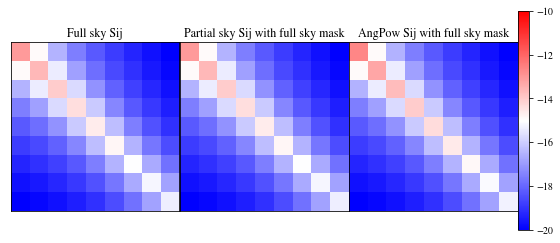

In [191]:
# Plotting the two matrices
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(8,3.5))
im = axes[0].imshow(np.log(abs(Sijw_fullG)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
im2 = axes[1].imshow(np.log(abs(Sijw_partG)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
im3 = axes[2].imshow(np.log(abs(Sijw_APG)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
axes[0].set_title('Full sky Sij')
axes[1].set_title('Partial sky Sij with full sky mask')
axes[2].set_title('AngPow Sij with full sky mask')
fig.subplots_adjust(left=0.02,bottom=0.08,top=0.9,wspace=0.002)
cbar_ax = fig.add_axes([0.9, 0.08, 0.02, 0.87])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=.5)

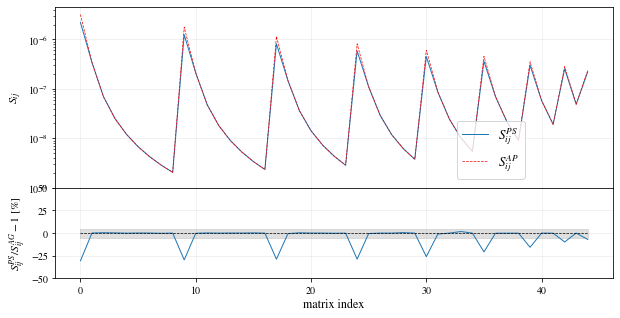

In [190]:
cov_vector1 = plotting_offD(Sijw_partG)
cov_vector2 = plotting_offD(Sijw_APG)

diff = ((Sijw_partG / Sijw_APG)-1)*100
cov_vector3 = plotting_offD(diff)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.set_ylabel('$S_{ij}$',fontsize=12);ax2.set_ylabel('$S_{ij}^{PS}/S_{ij}^{AG} -1\ [\%]$',fontsize=11.5)
ax2.set_xlabel('matrix index',fontsize=12)
ax1.semilogy(np.arange(len(cov_vector1)),abs(cov_vector1),linewidth='1',label='$S_{ij}^{PS}$')
ax1.semilogy(np.arange(len(cov_vector2)),abs(cov_vector2),'r--',linewidth='0.7',label='$S_{ij}^{AP}$')
ax2.plot(np.arange(len(cov_vector3)),cov_vector3,linewidth='1')
ax2.plot(np.arange(len(cov_vector3)),np.zeros(len(cov_vector3)),'r--',color='black',linewidth=0.7)
ax1.set_ylim(1e-9);ax2.set_ylim((-50,50))
ax2.fill_between(np.arange(len(cov_vector3)),5,-5,color='silver',alpha=0.5)
ax1.grid(alpha=0.2) ; ax2.grid(alpha=0.2)
ax1.legend(fontsize=13,loc=(0.72,0.05))
fig.subplots_adjust(hspace=.0)
fig.show()

## Partial sky Sij for DES mask

In [ ]:
t0 = time.clock()
Sijw_part_DESG = PySSC.Sij_psky(z_arr,windows_G,mask='./masks/DES-mask-simple-ring-1024.fits',verbose=True)
t1 = time.clock()
print('Computed in %.1f minutes' %((t1-t0)/60))

In [ ]:
t0 = time.clock()
Sijw_AngPow_DESG = PySSC_AP.Sij_AngPow(z_arr,windows_G,mask='./masks/DES-mask-simple-ring-1024.fits',verbose=True)
t1 = time.clock()
print('Computed in %.1f minutes' %((t1-t0)/60))

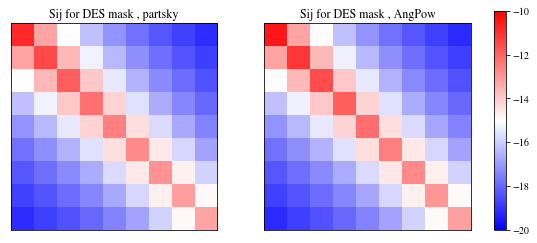

In [189]:
# Plotting the two matrices
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(8,3.5))
im = axes[0].imshow(np.log(abs(Sijw_part_DESG)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
im2 = axes[1].imshow(np.log(abs(Sijw_AngPow_DESG)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
axes[0].set_title('Sij for DES mask , partsky')
axes[1].set_title('Sij for DES mask , AngPow')
fig.subplots_adjust(left=0.02,bottom=0.08,top=0.9,wspace=0.002)
cbar_ax = fig.add_axes([0.9, 0.08, 0.02, 0.87])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=.5)

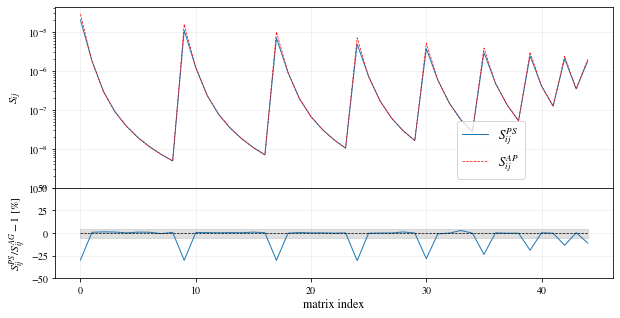

In [188]:
cov_vector1 = plotting_offD(Sijw_part_DESG)
cov_vector2 = plotting_offD(Sijw_AngPow_DESG)

diff = ((Sijw_part_DESG / Sijw_AngPow_DESG)-1)*100
cov_vector3 = plotting_offD(diff)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.set_ylabel('$S_{ij}$',fontsize=12);ax2.set_ylabel('$S_{ij}^{PS}/S_{ij}^{AG} -1\ [\%]$',fontsize=11.5)
ax2.set_xlabel('matrix index',fontsize=12)
ax1.semilogy(np.arange(len(cov_vector1)),abs(cov_vector1),linewidth='1',label='$S_{ij}^{PS}$')
ax1.semilogy(np.arange(len(cov_vector2)),abs(cov_vector2),'r--',linewidth='0.7',label='$S_{ij}^{AP}$')
ax2.plot(np.arange(len(cov_vector3)),cov_vector3,linewidth='1')
ax2.plot(np.arange(len(cov_vector3)),np.zeros(len(cov_vector3)),'r--',color='black',linewidth=0.7)
ax1.set_ylim(1e-9);ax2.set_ylim((-50,50))
ax2.fill_between(np.arange(len(cov_vector3)),5,-5,color='silver',alpha=0.5)
ax1.grid(alpha=0.2) ; ax2.grid(alpha=0.2)
ax1.legend(fontsize=13,loc=(0.72,0.05))
fig.subplots_adjust(hspace=.0)
fig.show()

## Partial sky Sij for Euclid mask

In [ ]:
t0 = time.clock()
Sijw_part_EuclidG = PySSC.Sij_psky(z_arr,windows_G,mask='./masks/Euclid_map_WIDE_SURVEY.fits',verbose=True)
t1 = time.clock()
print('Computed in %.1f minutes' %((t1-t0)/60))

In [ ]:
t0 = time.clock()
Sijw_AngPow_EuclidG = PySSC_AP.Sij_AngPow(z_arr,windows_G,mask='./masks/Euclid_map_WIDE_SURVEY.fits',verbose=True)
t1 = time.clock()
print('Computed in %.1f minutes' %((t1-t0)/60))

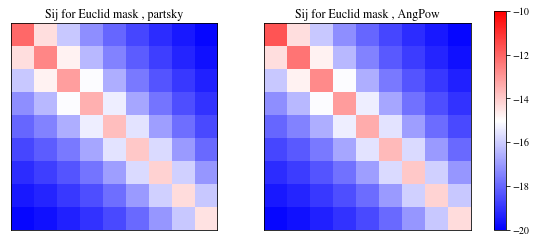

In [187]:
# Plotting the two matrices
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(8,3.5))
im = axes[0].imshow(np.log(abs(Sijw_part_EuclidG)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
im2 = axes[1].imshow(np.log(abs(Sijw_AngPow_EuclidG)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
axes[0].set_title('Sij for Euclid mask , partsky')
axes[1].set_title('Sij for Euclid mask , AngPow')
fig.subplots_adjust(left=0.02,bottom=0.08,top=0.9,wspace=0.002)
cbar_ax = fig.add_axes([0.9, 0.08, 0.02, 0.87])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=.5)

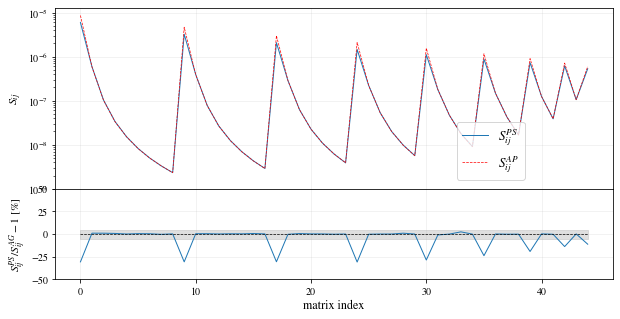

In [186]:
cov_vector1 = plotting_offD(Sijw_part_EuclidG)
cov_vector2 = plotting_offD(Sijw_AngPow_EuclidG)

diff = ((Sijw_part_EuclidG / Sijw_AngPow_EuclidG)-1)*100
cov_vector3 = plotting_offD(diff)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.set_ylabel('$S_{ij}$',fontsize=12);ax2.set_ylabel('$S_{ij}^{PS}/S_{ij}^{AG} -1\ [\%]$',fontsize=11.5)
ax2.set_xlabel('matrix index',fontsize=12)
ax1.semilogy(np.arange(len(cov_vector1)),abs(cov_vector1),linewidth='1',label='$S_{ij}^{PS}$')
ax1.semilogy(np.arange(len(cov_vector2)),abs(cov_vector2),'r--',linewidth='0.7',label='$S_{ij}^{AP}$')
ax2.plot(np.arange(len(cov_vector3)),cov_vector3,linewidth='1')
ax2.plot(np.arange(len(cov_vector3)),np.zeros(len(cov_vector3)),'r--',color='black',linewidth=0.7)
ax1.set_ylim(1e-9);ax2.set_ylim((-50,50))
ax2.fill_between(np.arange(len(cov_vector3)),5,-5,color='silver',alpha=0.5)
ax1.grid(alpha=0.2) ; ax2.grid(alpha=0.2)
ax1.legend(fontsize=13,loc=(0.72,0.05))
fig.subplots_adjust(hspace=.0)
fig.show()

## Partial sky Sij for 5 degrees patch

In [ ]:
t0 = time.clock()
Sijw_part_5dG = PySSC.Sij_psky(z_arr,windows_G,mask='./masks/circular-mask_5deg.fits',verbose=True)
t1 = time.clock()
print('Computed in %.1f minutes' %((t1-t0)/60))

In [ ]:
t0 = time.clock()
Sijw_AngPow_5dG = PySSC_AP.Sij_AngPow(z_arr,windows_G,mask='./masks/circular-mask_5deg.fits',var_precision=0.05,verbose=True)
t1 = time.clock()
print('Computed in %.1f minutes' %((t1-t0)/60))

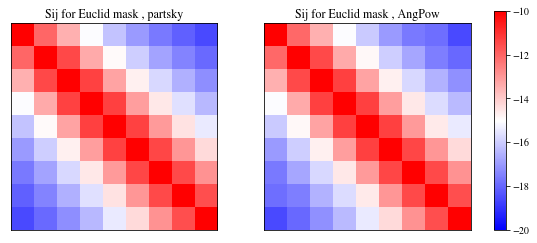

In [184]:
# Plotting the two matrices
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(8,3.5))
im = axes[0].imshow(np.log(abs(Sijw_part_5dG)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
im2 = axes[1].imshow(np.log(abs(Sijw_AngPow_5dG)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
axes[0].set_title('Sij for Euclid mask , partsky')
axes[1].set_title('Sij for Euclid mask , AngPow')
fig.subplots_adjust(left=0.02,bottom=0.08,top=0.9,wspace=0.002)
cbar_ax = fig.add_axes([0.9, 0.08, 0.02, 0.87])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=.5)

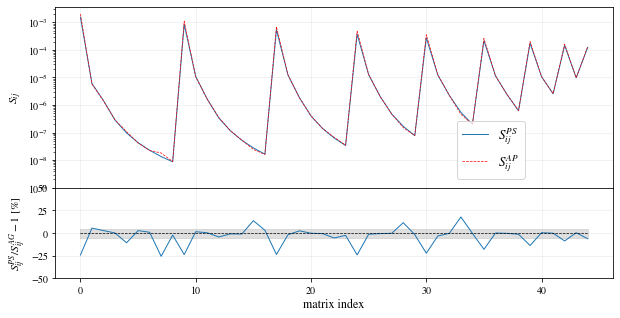

In [185]:
cov_vector1 = plotting_offD(Sijw_part_5dG)
cov_vector2 = plotting_offD(Sijw_AngPow_5dG)

diff = ((Sijw_part_5dG / Sijw_AngPow_5dG)-1)*100
cov_vector3 = plotting_offD(diff)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw=dict(height_ratios=[2,1]),figsize=(10,5))
ax1.set_ylabel('$S_{ij}$',fontsize=12);ax2.set_ylabel('$S_{ij}^{PS}/S_{ij}^{AG} -1\ [\%]$',fontsize=11.5)
ax2.set_xlabel('matrix index',fontsize=12)
ax1.semilogy(np.arange(len(cov_vector1)),abs(cov_vector1),linewidth='1',label='$S_{ij}^{PS}$')
ax1.semilogy(np.arange(len(cov_vector2)),abs(cov_vector2),'r--',linewidth='0.7',label='$S_{ij}^{AP}$')
ax2.plot(np.arange(len(cov_vector3)),cov_vector3,linewidth='1')
ax2.plot(np.arange(len(cov_vector3)),np.zeros(len(cov_vector3)),'r--',color='black',linewidth=0.7)
ax1.set_ylim(1e-9);ax2.set_ylim((-50,50))
ax2.fill_between(np.arange(len(cov_vector3)),5,-5,color='silver',alpha=0.5)
ax1.grid(alpha=0.2) ; ax2.grid(alpha=0.2)
ax1.legend(fontsize=13,loc=(0.72,0.05))
fig.subplots_adjust(hspace=.0)
fig.show()